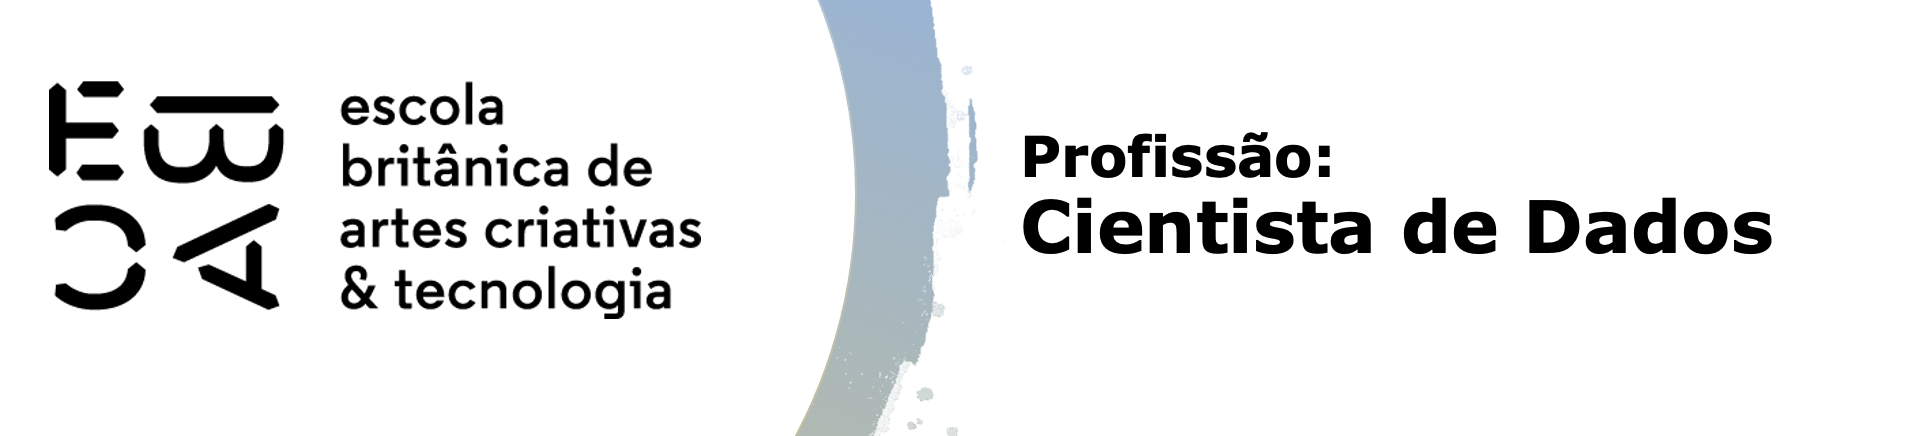

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, recall_score
from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import recall_score

In [2]:
X_train, Y_train, X_test, Y_test = (
    pd.read_csv('./csv/train/X_train.csv', index_col=[0, 1]), 
    pd.read_csv('./input/train/y_train.txt', sep=r'\s+', header=None, names=['activity']), 
    pd.read_csv('./csv/test/X_test.csv', index_col=[0, 1]), 
    pd.read_csv('./input/test/y_test.txt', sep=r'\s+', header=None, names=['activity'])
)

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [3]:
clf_top = DecisionTreeClassifier(random_state=4, min_samples_leaf=20)
clf_top.fit(X_train, Y_train)

feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': clf_top.feature_importances_
})

feature_importances = feature_importances.sort_values('importance', ascending=False)

print("Feature Importances:")
print(feature_importances)

top_3_features = feature_importances.head(3)
print("\nTop 3 Most Important Features:")
print(top_3_features)

Feature Importances:
                             feature  importance
52               tGravityAcc-min()-X    0.257561
389  fBodyAccJerk-bandsEnergy()-1,16    0.216113
559             angle(Y,gravityMean)    0.145879
508             fBodyAccMag-energy()    0.117396
74         tGravityAcc-arCoeff()-Z,2    0.103234
..                               ...         ...
4                   tBodyAcc-std()-Y    0.000000
3                   tBodyAcc-std()-X    0.000000
2                  tBodyAcc-mean()-Z    0.000000
0                  tBodyAcc-mean()-X    0.000000
31            tBodyAcc-arCoeff()-Y,3    0.000000

[561 rows x 2 columns]

Top 3 Most Important Features:
                             feature  importance
52               tGravityAcc-min()-X    0.257561
389  fBodyAccJerk-bandsEnergy()-1,16    0.216113
559             angle(Y,gravityMean)    0.145879


In [4]:
top_features = top_3_features['feature'].tolist()

X_train_top = X_train[top_features]
X_test_top  = X_test[top_features]

In [5]:
base_clf = DecisionTreeClassifier(random_state=4, min_samples_leaf=20)
path = base_clf.cost_complexity_pruning_path(X_train_top, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = np.unique(ccp_alphas[ccp_alphas >= 0])

In [6]:
ccp_alphas.shape[0]

104

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [7]:
%%time
clf = DecisionTreeClassifier(random_state=4)

grid_params = {'ccp_alpha': ccp_alphas}
grid = GridSearchCV(estimator=clf, param_grid=grid_params, cv=10, verbose=100)
grid.fit(X_train_top, Y_train)

Fitting 10 folds for each of 104 candidates, totalling 1040 fits
[CV 1/10; 1/104] START ccp_alpha=0.0............................................
[CV 1/10; 1/104] END .............ccp_alpha=0.0;, score=0.808 total time=   0.0s
[CV 2/10; 1/104] START ccp_alpha=0.0............................................
[CV 2/10; 1/104] END .............ccp_alpha=0.0;, score=0.721 total time=   0.0s
[CV 3/10; 1/104] START ccp_alpha=0.0............................................
[CV 3/10; 1/104] END .............ccp_alpha=0.0;, score=0.792 total time=   0.0s
[CV 4/10; 1/104] START ccp_alpha=0.0............................................
[CV 4/10; 1/104] END .............ccp_alpha=0.0;, score=0.698 total time=   0.0s
[CV 5/10; 1/104] START ccp_alpha=0.0............................................
[CV 5/10; 1/104] END .............ccp_alpha=0.0;, score=0.739 total time=   0.0s
[CV 6/10; 1/104] START ccp_alpha=0.0............................................
[CV 6/10; 1/104] END .............ccp_alpha=

,estimator,DecisionTreeC...andom_state=4)
,param_grid,{'ccp_alpha': array([0.0000...86138242e-01])}
,scoring,None
,n_jobs,None
,refit,True
,cv,10
,verbose,100
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [8]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018983,0.001277,0.002568,0.000212,0.000000,{'ccp_alpha': 0.0},0.808424,0.721467,0.791837,0.697959,0.738776,0.755102,0.770068,0.779592,0.814966,0.763265,0.764146,0.035372,71
1,0.018580,0.000402,0.002388,0.000290,0.000006,{'ccp_alpha': 6.436212575154979e-06},0.808424,0.721467,0.791837,0.697959,0.738776,0.755102,0.770068,0.779592,0.814966,0.763265,0.764146,0.035372,71
2,0.018593,0.000414,0.002357,0.000131,0.000007,{'ccp_alpha': 6.599064264795887e-06},0.808424,0.721467,0.791837,0.697959,0.738776,0.755102,0.770068,0.779592,0.814966,0.763265,0.764146,0.035372,71
3,0.018698,0.000885,0.002257,0.000165,0.000007,{'ccp_alpha': 6.6507932295240295e-06},0.808424,0.721467,0.791837,0.697959,0.738776,0.755102,0.770068,0.779592,0.814966,0.763265,0.764146,0.035372,71
4,0.018559,0.000460,0.002273,0.000090,0.000009,{'ccp_alpha': 8.570202676999486e-06},0.808424,0.721467,0.791837,0.697959,0.738776,0.755102,0.770068,0.779592,0.814966,0.763265,0.764146,0.035372,71


### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [9]:
melhor_ccp = resultados.iloc[grid.best_index_,4]

clf = DecisionTreeClassifier(random_state=4, ccp_alpha=melhor_ccp).fit(X_train_top, Y_train)

clf.score(X_test_top, Y_test)

0.6898540889039702

Acurácia: 68.99


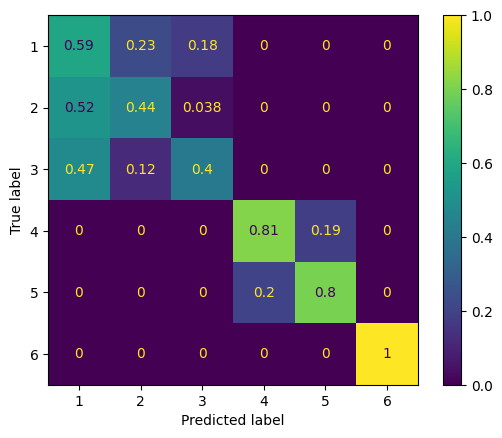

In [10]:
acuracia_teste = clf.score(X_test_top, Y_test)

print(f'Acurácia: {acuracia_teste*100:.2f}')
confunsion_matrix_display = ConfusionMatrixDisplay.from_estimator(
    clf, X_test_top, Y_test, normalize='true'
)

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [11]:
# from sklearn.metrics import recall_score, accuracy_score, classification_report, ConfusionMatrixDisplay

# 1) Treinar uma árvore base (todas as variáveis) para identificar a classe com maior erro
base = DecisionTreeClassifier(random_state=4, min_samples_leaf=20)
base.fit(X_train, Y_train)
y_test_pred = base.predict(X_test)
labels = np.unique(Y_test)
recalls = recall_score(Y_test, y_test_pred, labels=labels, average=None)

worst_label = labels[np.argmin(recalls)]
print(f"Classe com pior recall: {worst_label}")
print("Recall por classe:")
for lab, r in zip(labels, recalls):
    print(lab, f"{r:.4f}")

Classe com pior recall: 4
Recall por classe:
1 0.9294
2 0.7707
3 0.7786
4 0.7658
5 0.8910
6 1.0000


In [12]:
Y_train_bin = (Y_train['activity'] == worst_label).astype(int)
Y_test_bin  = (Y_test['activity'] == worst_label).astype(int)

In [13]:
Y_test_bin.sort_values()

2928    0
2929    0
2930    0
2931    0
2932    0
       ..
2076    1
31      1
2077    1
2078    1
2079    1
Name: activity, Length: 2947, dtype: int64

In [14]:
simple_clf = DecisionTreeClassifier(random_state=4, min_samples_leaf=20, max_depth=4)
simple_clf.fit(X_train, Y_train_bin)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,20
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,4
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [15]:
feat_imp = pd.DataFrame({
    'feature': X_train.columns,
    'importance': simple_clf.feature_importances_
})

feat_imp = feat_imp.sort_values('importance', ascending=False)

print("Feature Importances:")
print(feat_imp)

top3_new = feat_imp.head(3)
print("\nTop 3 Most Important Features:")
print(top3_new)
top3_new = top3_new['feature'].tolist()

Feature Importances:
                                  feature  importance
52                    tGravityAcc-min()-X    0.466920
559                  angle(Y,gravityMean)    0.283713
426                     fBodyGyro-std()-X    0.185952
57                 tGravityAcc-energy()-Y    0.030455
50                    tGravityAcc-max()-Y    0.007955
..                                    ...         ...
556      angle(tBodyGyroMean,gravityMean)    0.000000
557  angle(tBodyGyroJerkMean,gravityMean)    0.000000
558                  angle(X,gravityMean)    0.000000
3                        tBodyAcc-std()-X    0.000000
16                    tBodyAcc-energy()-X    0.000000

[561 rows x 2 columns]

Top 3 Most Important Features:
                  feature  importance
52    tGravityAcc-min()-X    0.466920
559  angle(Y,gravityMean)    0.283713
426     fBodyGyro-std()-X    0.185952


In [16]:
X_train_top3 = X_train[top3_new]
X_test_top3  = X_test[top3_new]

In [17]:
clf_top3 = DecisionTreeClassifier(random_state=4, min_samples_leaf=20, max_depth=4)
clf_top3.fit(X_train_top3, Y_train_bin)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,20
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,4
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Acurácia: 94.67


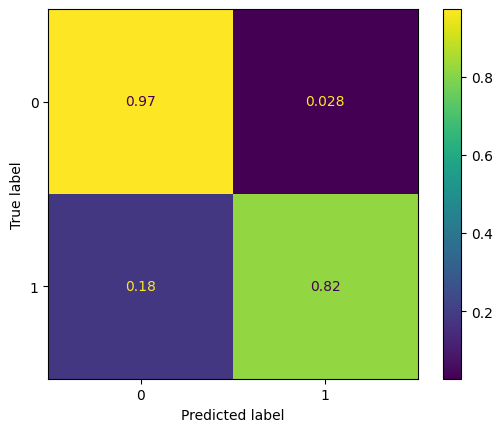

In [18]:
acuracia_teste = clf_top3.score(X_test_top3, Y_test_bin)

print(f'Acurácia: {acuracia_teste*100:.2f}')
confunsion_matrix_display = ConfusionMatrixDisplay.from_estimator(
    clf_top3, X_test_top3, Y_test_bin, normalize='true'
)

Acurácia: 72.85


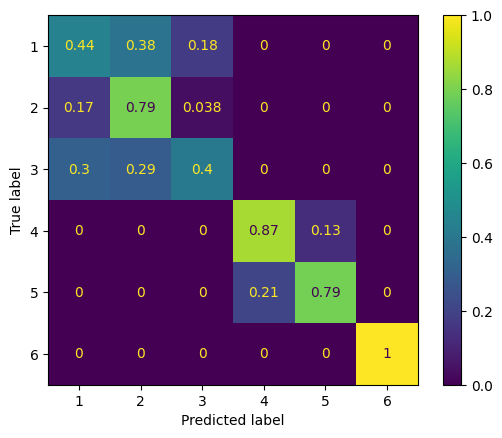

In [19]:
X_train_top6 = X_train[top_features + top3_new]
X_test_top6 = X_test[top_features + top3_new]



clf_bin_top6 = DecisionTreeClassifier(random_state=4, min_samples_leaf=20, max_depth=4)
clf_bin_top6.fit(X_train_top6, Y_train)

acuracia_teste = clf_bin_top6.score(X_test_top6, Y_test)

print(f'Acurácia: {acuracia_teste*100:.2f}')
confunsion_matrix_display = ConfusionMatrixDisplay.from_estimator(
    clf_bin_top6, X_test_top6, Y_test, normalize='true'
)